<a href="https://colab.research.google.com/github/mismatchgit/PyTorch-tutorial-freecodecamp/blob/main/Pytorch_workflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow

In [1]:
import torch
from torch import nn #building blocks of pytorch
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.6.0+cu124'

## Data Preparing and loading

In [5]:
#linear regression
w=0.7
b=0.3

#create
start=0
end=1
step=0.01
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = (w*X) + b

X[:10], y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]),
 100,
 100)

## Splitting the Dta into train, validation, test

In [9]:
#create a train test split
train_split = int(.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test), len(y_train)

(20, 80)

### Visualization

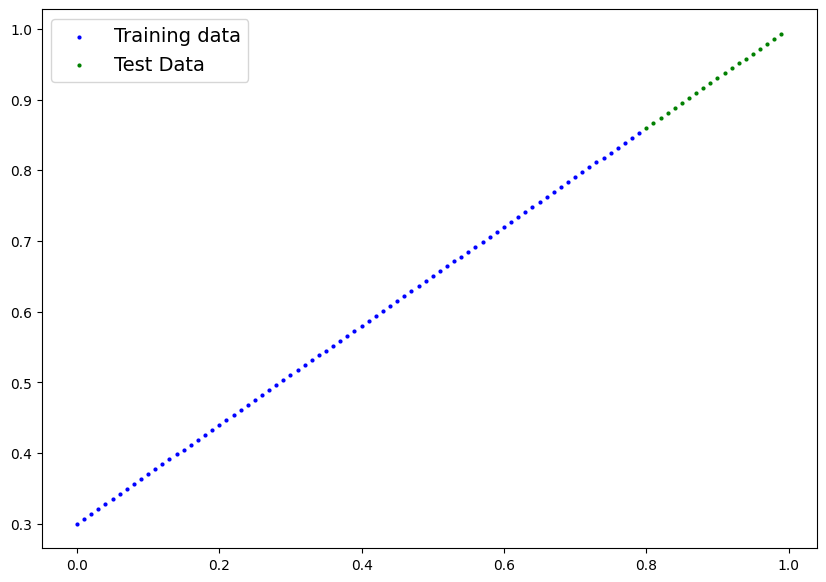

In [21]:
def plot_prediction(train_data =X_train,
                       train_labels=y_train,
                       test_data=X_test,
                       test_labels=y_test,
                       predictions=None):

  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test Data")

  if predictions is not None:
    plt.scatter(test_data,predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size":14});
plot_prediction();

## Building first model

In [23]:
# create linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    #initialize model parameters
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad= True,
                                        dtype=torch.float32))
    #forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the input
      return self.weights * x + self.bias #linear regression output

### Pytorch Model Building essentials

https://www.learnpytorch.io/01_pytorch_workflow/#pytorch-model-building-essentialsMM

### checking the contents of the Model

In [26]:
#create a random seed
torch.manual_seed(42)

#create and istance of the model
model_0 = LinearRegressionModel()

#check out the params
model_0.parameters

#check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [27]:
#list the named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])